In [14]:
import praw
import datetime as dt
import time
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [72]:
d = pd.read_json('2018-08-13 15:53:08.197863_posts.json')
crit = (d['matureScore']> -.5)& (d['midScore'] != -0.5) & (d['earlyScore'] > -100) & (d['earlyScore'] < 10) #& (d['matureScore'] < 800)
fullData = d.loc[crit]
#print(fullData)
def roi(v0, vf): #sourced from https://memes.market/resources/paper.pdf
    gain = vf - v0
    L = 1.2+1.9/(v0/10 + 1)
    stp = 0.04/(v0/100 + 1)
    mid = 0.018*v0
    return L / (1 + math.exp(-stp*(gain-mid)))

(100,)


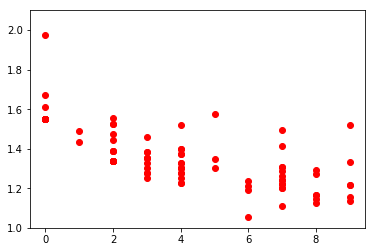

In [73]:

e = fullData['earlyScore']
mid = fullData['midScore']
mat = fullData['matureScore']
print(mat.shape)
plt.ylim((1, 2.1))
#plt.plot(e, mat, 'bo')
vecRoi = np.vectorize(roi)

plt.plot(e,vecRoi(e.values, mat.values), 'ro')



#d[math.isnan(d.earlyScore.tolist())]